In [1]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [2]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=8807, step=1)

In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df["director"].fillna("anonymous",inplace = True)
df["cast"].fillna("anonymous",inplace = True)
df["country"].fillna("anonymous",inplace = True)
df["rating"].fillna("anonymous",inplace = True)

In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Outliers

In [10]:
q1 = df["release_year"].quantile(0.25)
q3 = df["release_year"].quantile(0.75)

In [11]:
IQR = q3 - q1
IQR

6.0

In [12]:
low = q1-1.5*IQR
high = q3 + 1.5*IQR

In [13]:
df[(df["release_year"] < low) | (df["release_year"] > high)]
    

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",anonymous,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
26,s27,Movie,Minsara Kanavu,Rajiv Menon,"Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....",anonymous,"September 21, 2021",1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals",A tangled love triangle ensues when a man fall...
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...
...,...,...,...,...,...,...,...,...,...,...,...,...
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...
8766,s8767,Movie,XXx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,"January 1, 2019",2002,PG-13,124 min,"Action & Adventure, Sports Movies",A notorious underground rush-seeker deemed unt...
8768,s8769,Movie,Y Tu Mamá También,Alfonso Cuarón,"Maribel Verdú, Gael García Bernal, Diego Luna,...",Mexico,"June 1, 2017",2001,R,106 min,"Dramas, Independent Movies, International Movies",When rich teens Tenoch and Julio meet the allu...
8770,s8771,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,"March 1, 2018",2001,TV-14,171 min,"Dramas, International Movies, Romantic Movies",Two young lovers set out to overcome the obsta...


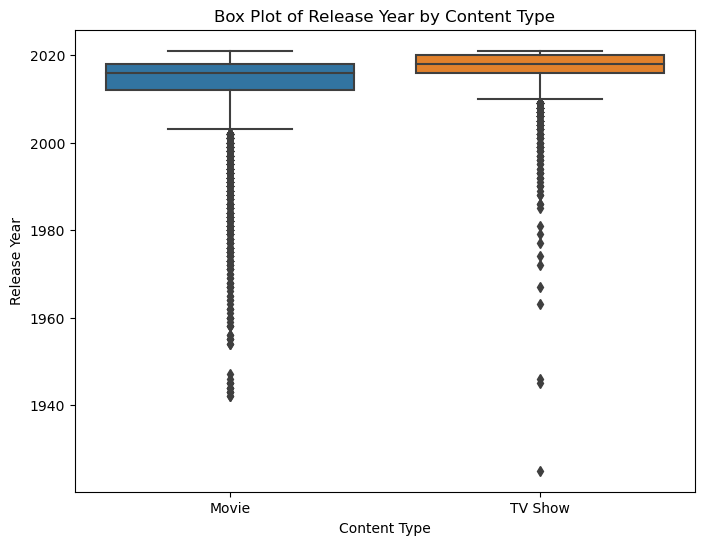

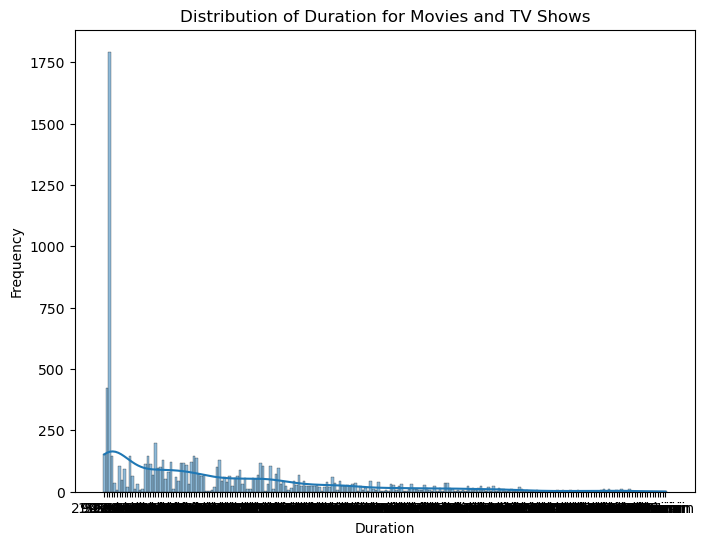

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='release_year', data=df)
plt.title('Box Plot of Release Year by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Release Year')
plt.show()

# Histogram for Duration
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='duration', bins=30, kde=True)
plt.title('Distribution of Duration for Movies and TV Shows')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


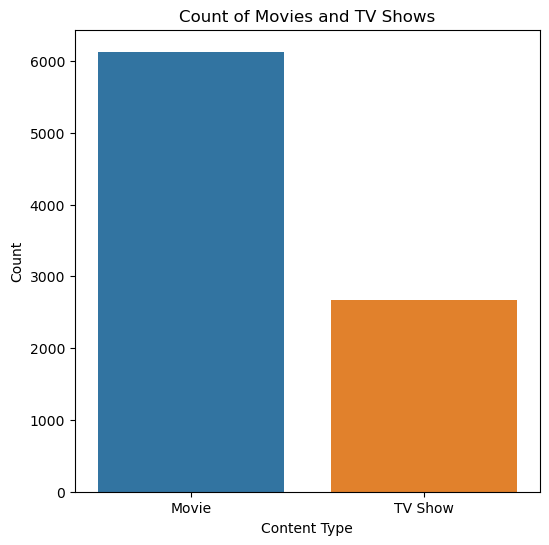

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='type')
plt.title('Count of Movies and TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()



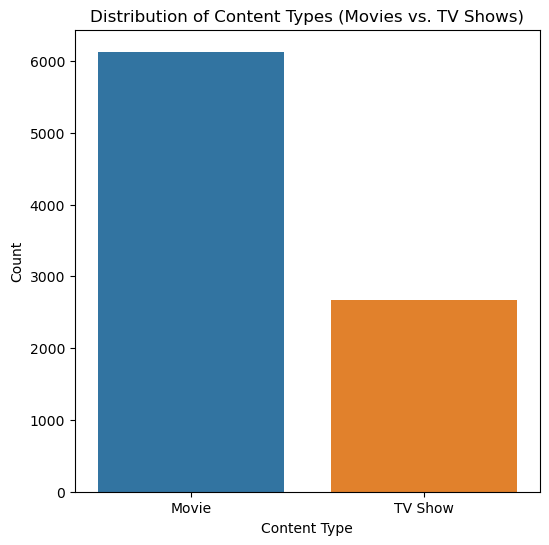

Proportion of Movies: 0.6968387536957016
Proportion of TV Shows: 0.30316124630429836


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot for Content Type (Movies vs. TV Shows)
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Types (Movies vs. TV Shows)')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

# Calculate the proportion of each content type
content_type_proportions = df['type'].value_counts(normalize=True)

# Print the proportion of each content type
print("Proportion of Movies:", content_type_proportions['Movie'])
print("Proportion of TV Shows:", content_type_proportions['TV Show'])



In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,anonymous,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",anonymous,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,anonymous,anonymous,anonymous,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,anonymous,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


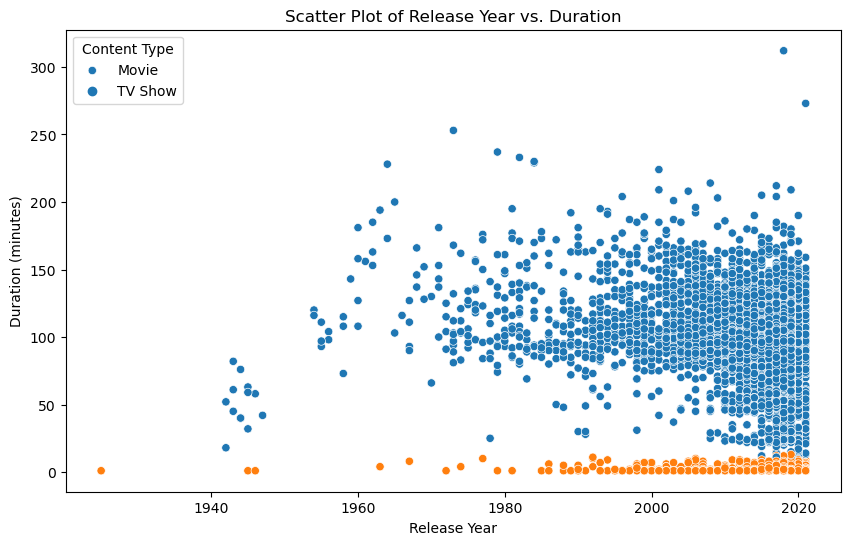

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'duration' to numerical values (extract the numeric part and convert to int)
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

# Scatter plot: Release Year vs. Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='release_year', y='duration_numeric', hue='type')
plt.title('Scatter Plot of Release Year vs. Duration')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.legend(title='Content Type', labels=['Movie', 'TV Show'])
plt.show()



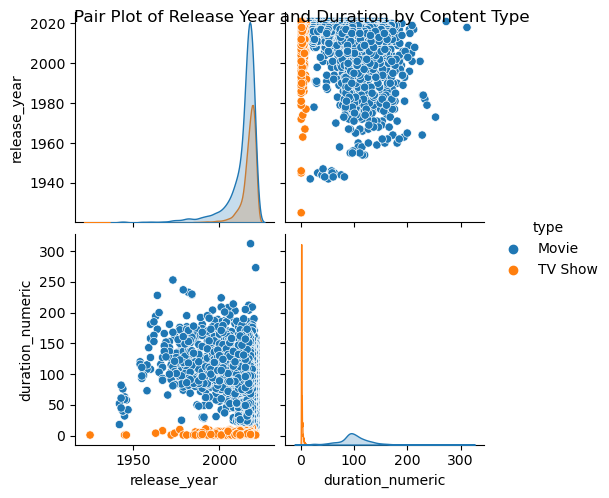

In [19]:
sns.pairplot(data=df, vars=['release_year', 'duration_numeric'], hue='type', diag_kind='kde')
plt.suptitle('Pair Plot of Release Year and Duration by Content Type')
plt.show()


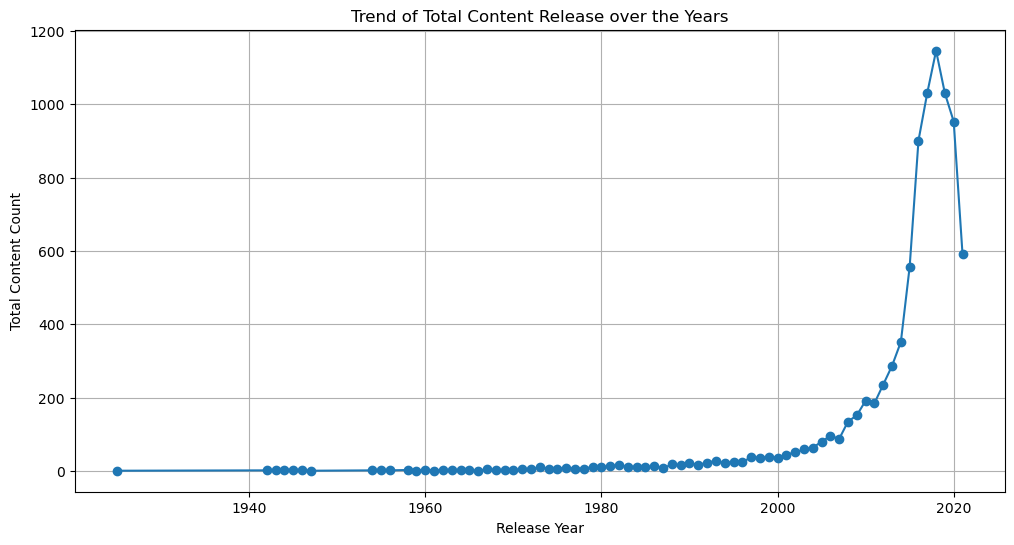

In [20]:
import matplotlib.pyplot as plt

# Count the number of movies and TV shows for each release year
content_counts = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Total content count (sum of movies and TV shows) for each release year
total_content_counts = content_counts.sum(axis=1)

# Line chart: Trend of total content release over the years
plt.figure(figsize=(12, 6))
plt.plot(total_content_counts.index, total_content_counts.values, marker='o')
plt.title('Trend of Total Content Release over the Years')
plt.xlabel('Release Year')
plt.ylabel('Total Content Count')
plt.grid(True)
plt.show()


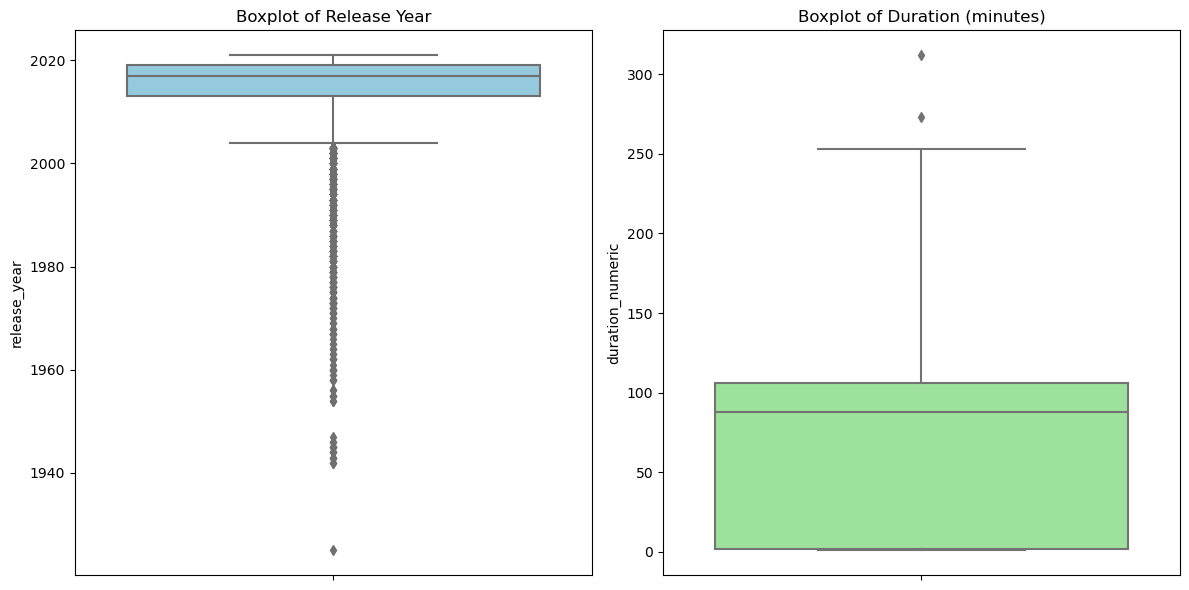

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'data' is the DataFrame containing the Netflix dataset

# Convert 'duration' to numerical values (extract the numeric part and convert to int)
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

# Create boxplots to analyze outliers in 'release_year' and 'duration_numeric'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='release_year', color='skyblue')
plt.title('Boxplot of Release Year')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='duration_numeric', color='lightgreen')
plt.title('Boxplot of Duration (minutes)')

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

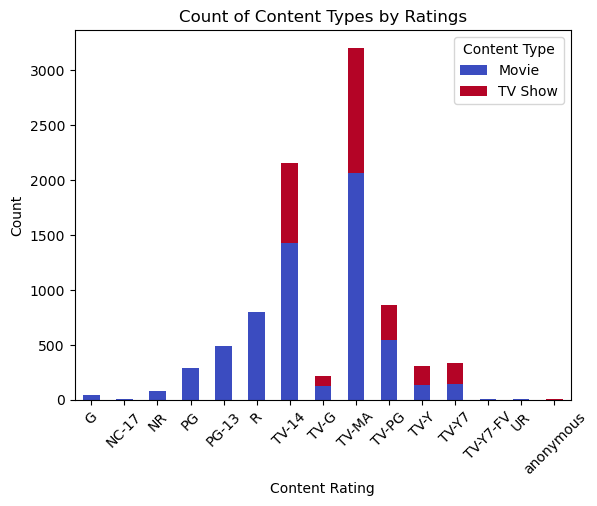

In [22]:
import pandas as pd

# Group data by 'rating' and 'type', and count the occurrences
rating_type_counts = df.groupby(['rating', 'type']).size().unstack()

# Create a stacked bar chart for count of content types by ratings
plt.figure(figsize=(12, 6))
rating_type_counts.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Count of Content Types by Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Content Type', labels=['Movie', 'TV Show'])
plt.show()


<AxesSubplot:title={'center':'pie chart to show movies released by countries in years'}, ylabel='country'>

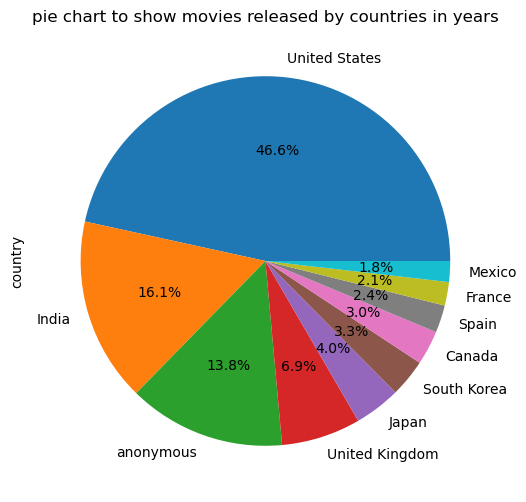

In [23]:
plt.figure(figsize=(8,6))
fil_coun = df[df['country']!='Others']
fil_coun['country'].value_counts()[:10].sort_values(ascending = False).plot(kind ='pie',title = 'pie chart to show movies released by countries in years',autopct='%.1f%%')

Text(0, 0.5, 'Movies')

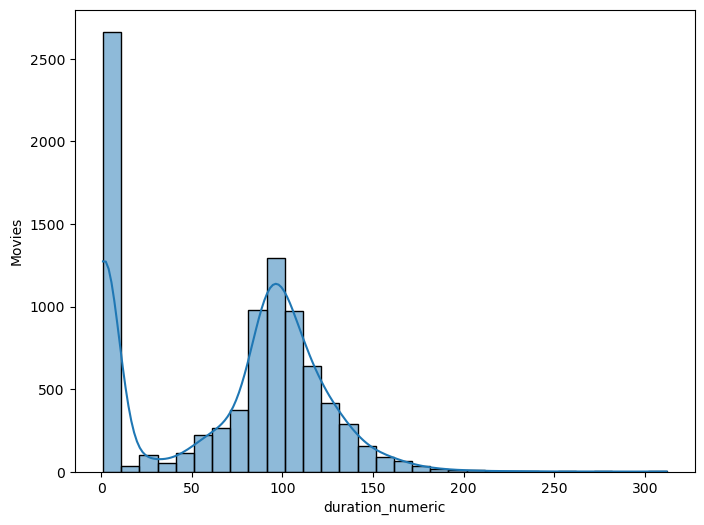

In [30]:
plt.figure(figsize=(8,6))
sns.histplot(df["duration_numeric"],kde=True)
plt.ylabel("Movies")

# UNIVARIATE ANALYSIS

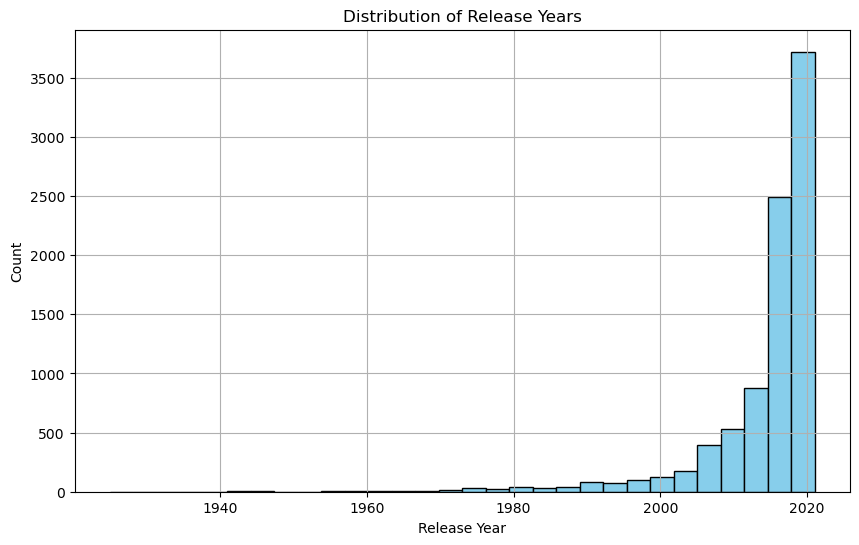

In [29]:
import matplotlib.pyplot as pt  #Univariate Analysis of Release Year:
plt.figure(figsize=(10, 6))
plt.hist(df['release_year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid()
plt.show()


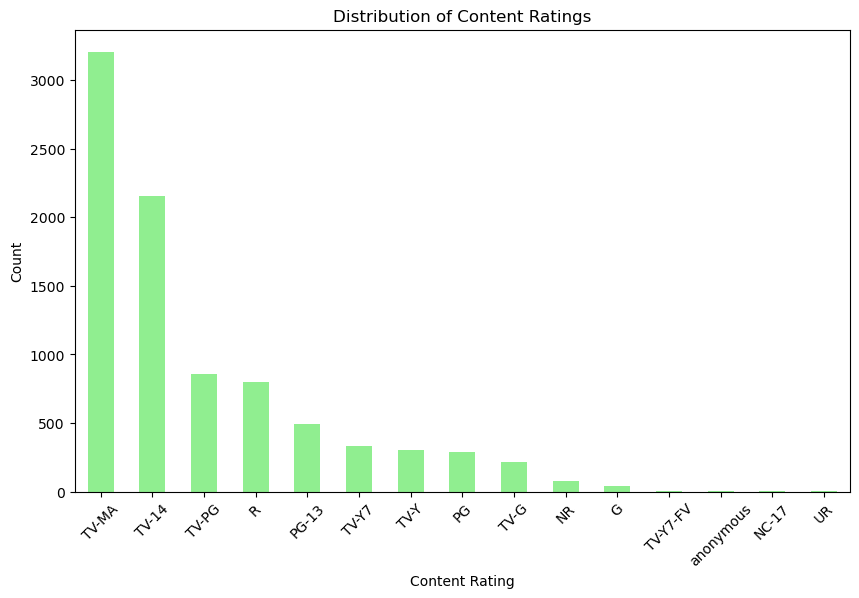

In [30]:
# Calculate the count of each content rating
rating_counts = df['rating'].value_counts()  #Univariate Analysis of Content Ratings:

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


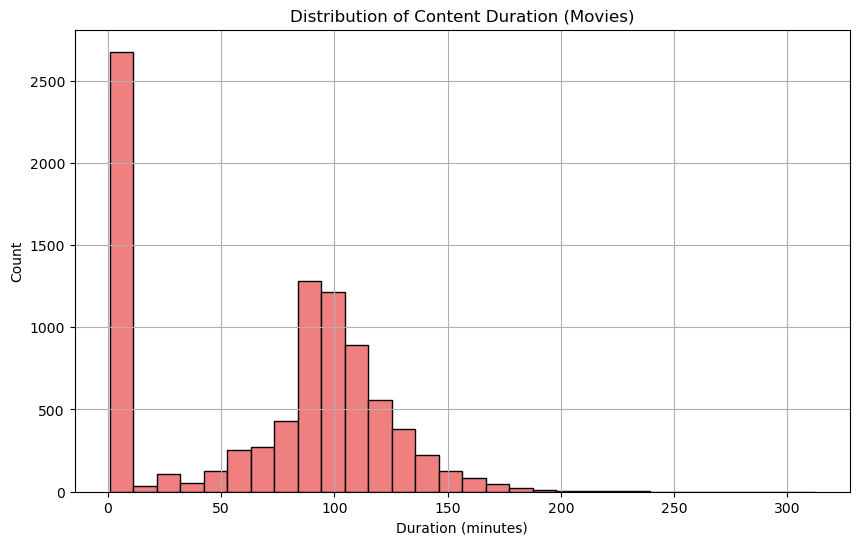

In [13]:
# Convert 'duration' to numerical values (extract the numeric part and convert to int)
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)  #Univariate Analysis of Content Duration:

plt.figure(figsize=(10, 6))
plt.hist(df['duration_numeric'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Content Duration (Movies)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.grid()
plt.show()


In [32]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_numeric
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,anonymous,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
1,s2,TV Show,Blood & Water,anonymous,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",anonymous,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0
3,s4,TV Show,Jailbirds New Orleans,anonymous,anonymous,anonymous,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0
4,s5,TV Show,Kota Factory,anonymous,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0


# BIVARIATE ANALYSIS

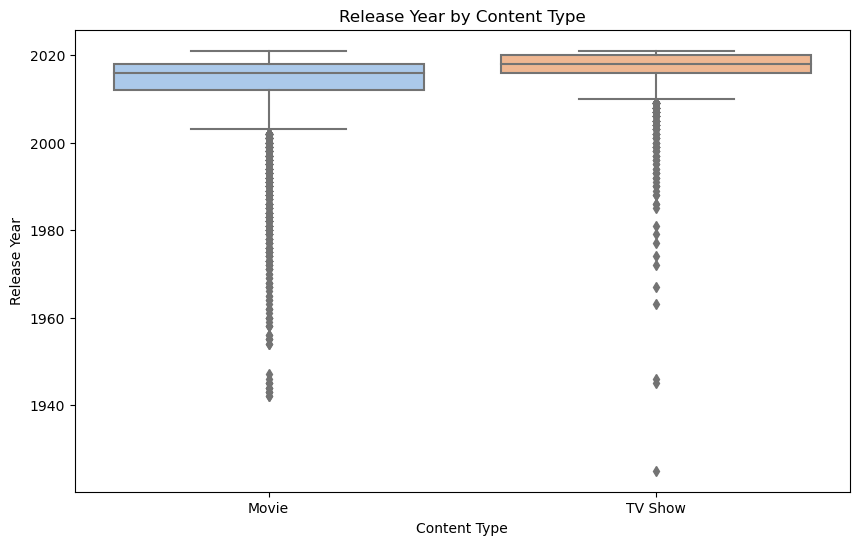

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

#Bivariate Analysis of Release Year and Content Type:

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='release_year', data=df, palette='pastel')
plt.title('Release Year by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Release Year')
plt.show()


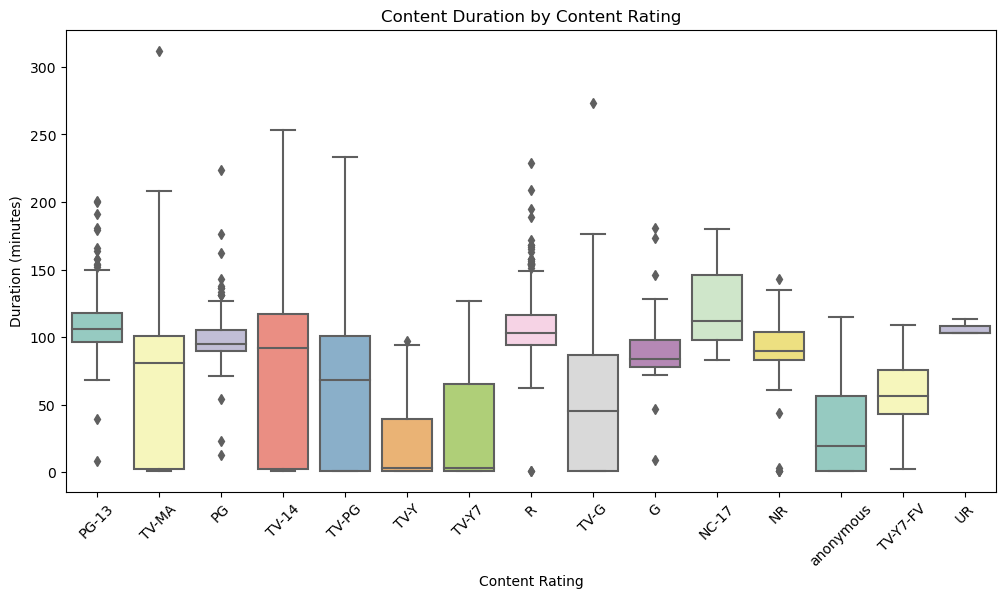

In [34]:
#Bivariate Analysis of Content Duration and Content Rating:
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration_numeric', data=df, palette='Set3')
plt.title('Content Duration by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x600 with 0 Axes>

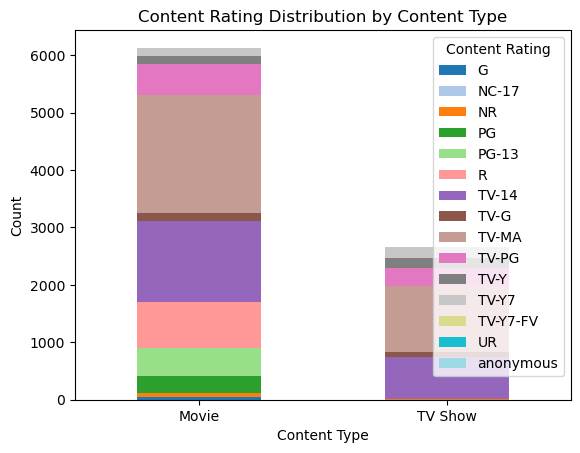

In [36]:
#Bivariate Analysis of Content Type and Content Rating:
type_rating_counts = df.groupby(['type', 'rating']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
type_rating_counts.plot(kind='bar', colormap='tab20', stacked=True)
plt.title('Content Rating Distribution by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Content Rating')
plt.show()


# MULTIVARIATE ANALYSIS

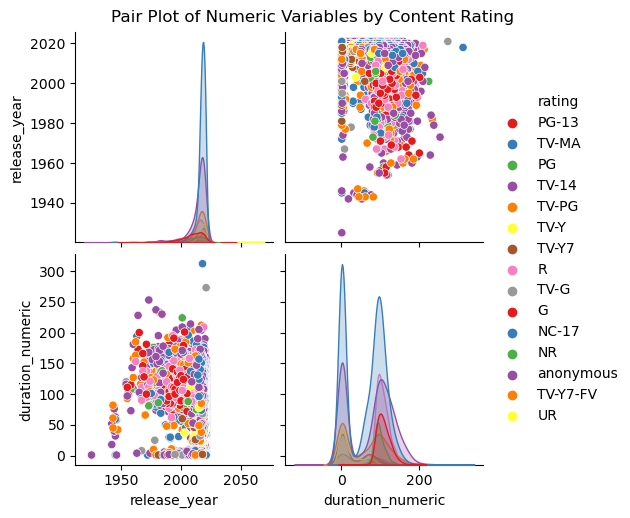

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt   #Multivariate Analysis with Pair Plots:

# Filter for numeric columns
numeric_cols = df[['release_year', 'duration_numeric', 'rating']]

# Create a pair plot
sns.pairplot(numeric_cols, hue='rating', palette='Set1')
plt.suptitle('Pair Plot of Numeric Variables by Content Rating', y=1.02)
plt.show()


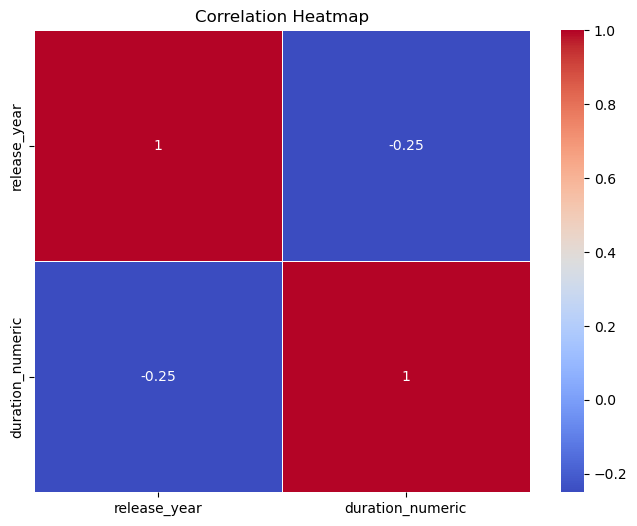

In [38]:
# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()  #Multivariate Analysis with Heatmap:

# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<Figure size 1200x600 with 0 Axes>

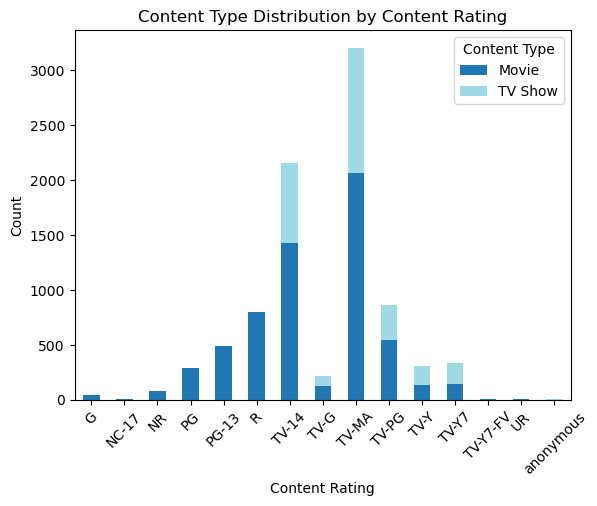

In [39]:
# Group data by 'rating' and 'type', and count the occurrences
type_rating_counts = df.groupby(['rating', 'type']).size().unstack().fillna(0)  #Multivariate Analysis with Grouped Bar Chart:

plt.figure(figsize=(12, 6))
type_rating_counts.plot(kind='bar', colormap='tab20', stacked=True)
plt.title('Content Type Distribution by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()


# CONVERTING TO NORMAL DISTRIBUTION

To assess the type of distribution for a dataset or a specific column,
you can create a histogram and visually inspect the data's distribution. 
Converting data to a normal distribution is often done through various transformations.
Let's start by examining the distribution of the 'duration_numeric' column, which represents the duration of content in minutes.


# Assessing the Distribution:
We'll create a histogram to visualize the distribution of the 'duration_numeric' column.



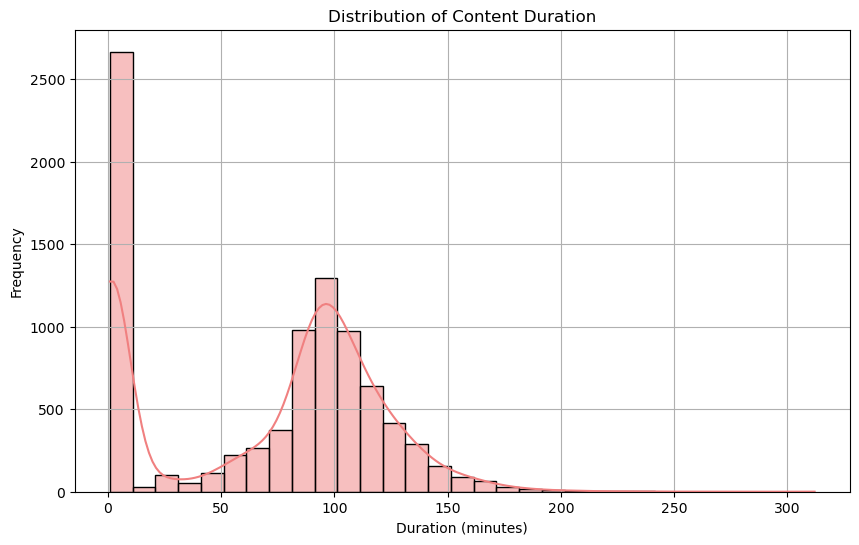

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['duration_numeric'], kde=True, color='lightcoral')
plt.title('Distribution of Content Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


# Transforming to Normal Distribution:
if the data does not follow a normal distribution and you want to convert it into a normal distribution, you can apply various transformations, such as logarithmic, square root, or Box-Cox transformations. However, keep in mind that not all data can be transformed into a perfect normal distribution.

Let's demonstrate a simple logarithmic transformation on the 'duration_numeric' column:

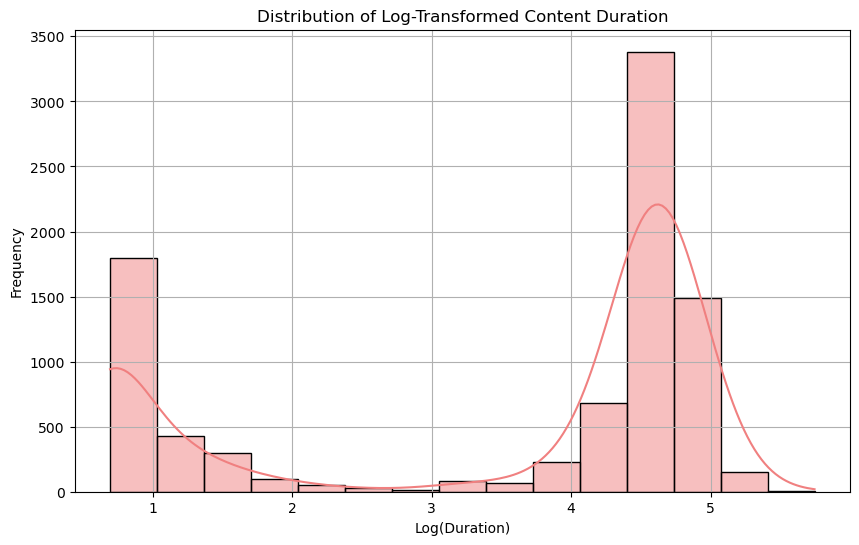

In [27]:
import numpy as np

# Logarithmic transformation
df['duration_log'] = np.log1p(df['duration_numeric'])

# Create a histogram for the transformed data
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_log'], kde=True, color='lightcoral')
plt.title('Distribution of Log-Transformed Content Duration')
plt.xlabel('Log(Duration)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


# HYPOTHESIS TESTING

# Hypothesis Test for Content Types (Movies vs. TV Shows):
Null Hypothesis (H0): The average duration of Movies and TV Shows is the same.
Alternative Hypothesis (H1): The average duration of Movies and TV Shows is different. 
In this code, we split the data into two groups: Movies and TV Shows. We then use a two-sample t-test to compare the means of the 'duration_numeric' column for these two groups. If the p-value is less than the chosen significance level (alpha), we reject the null hypothesis, indicating that there is a statistically significant difference in the average duration between Movies and TV Shows.

In [44]:
import scipy.stats as stats

movies_duration = df[df['type'] == 'Movie']['duration_numeric']
tv_shows_duration = df[df['type'] == 'TV Show']['duration_numeric']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(movies_duration, tv_shows_duration, equal_var=False)

# Set the significance level (alpha)
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: The average durations are different.")
else:
    print("Fail to reject the null hypothesis: The average durations are the same.")


Reject the null hypothesis: The average durations are different.
